<a href="https://colab.research.google.com/github/devkakeri06/xray-image-processing/blob/main/X_Ray_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**X-Ray Image Processing Techniques to detect catheters and tubes.**


Hospital patients can have catheters and lines inserted during the course of their admission and
serious complications can arise if they are positioned incorrectly.
The gold standards for the confirmation of line and tube positions are chest radiographs.
However, a physician or radiologist must manually check these chest x-rays to verify that the
lines and tubes are in the optimal position. Not only does this leave room for human error, but
delays are also common as radiologists can be busy reporting other scans. Automatically
detection of malposition catheters and lines is useful for early alerts. Once alerted, clinicians
can reposition or remove them to avoid life-threatening complications.
Here, there is a zip file attached with this file containing 50 chest X- rays’ images. These X–rays
may contain catheters and lines. These are following tasks that one may need to complete with
python.


**OBJECTIVES:-**

○ Select 10 random images.

○ Apply five to ten (minimum 5 ) image processing techniques or filters(masks) on these
images.

○ State the response of each filter on these images.

○ Which filter will you prefer for the detect and visualization of catheters and lines in X-ray
images and why?

○ How can deep learning help to detect presence of catheters and lines in images and
which model you prefer?( coding is not required)




In [ ]:
# Importing Libraries

!pip3 install opencv-python matplotlib numpy

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from skimage import data, img_as_float
from skimage import exposure
import os
from os import listdir

!unzip IMAGES.zip

n
n
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Archive:  IMAGES.zip
replace IMAGES/1.2.826.0.1.3680043.8.498.10001175380298620851477409998730672515.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace IMAGES/1.2.826.0.1.3680043.8.498.10001274045312501651093242392099983211.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace IMAGES/1.2.826.0.1.3680043.8.498.10002446304107330308555550280339793610.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace IMAGES/1.2.826.0.1.3680043.8.498.10006237848798781176388878065969229683.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace IMAGES/1.2.826.0.1.3680043.8.498.10009230449649555463787687058581068839.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace IMAGES/1.2.826.0.1.3680043.8.498.10010621324226224265011850078370952894.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace IMAGES/1.2.826.0.1.3680043.8.498.10012076044416201719708790381665812951.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
r

**Canny Edge Detection Algorithm**

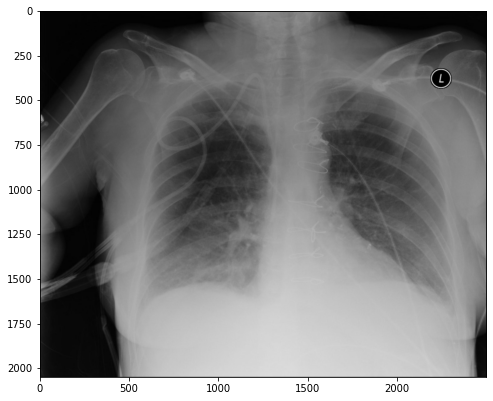

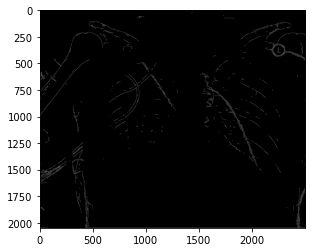

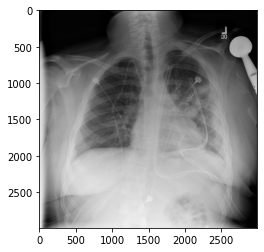

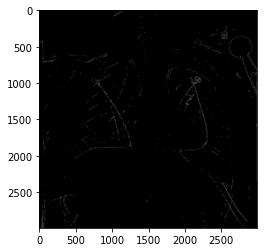

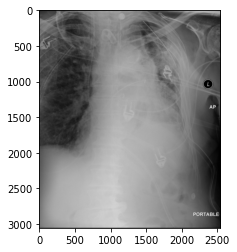

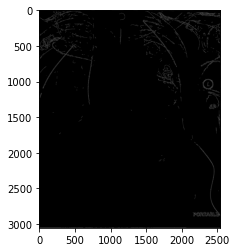

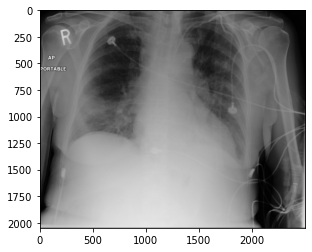

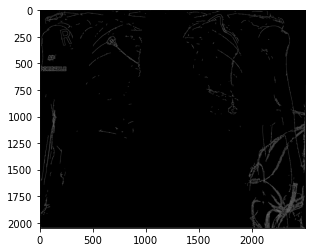

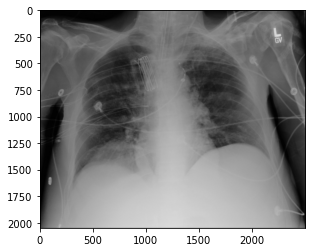

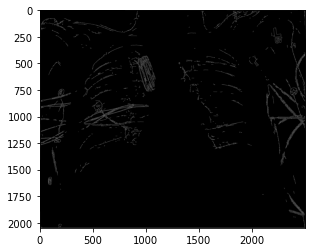

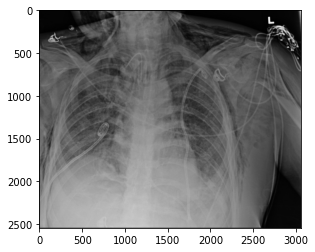

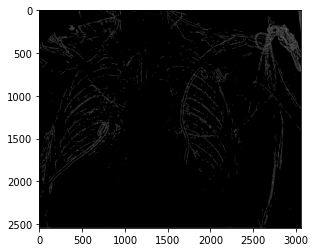

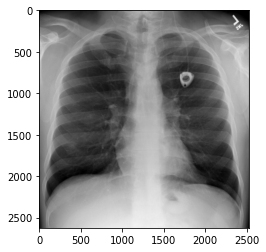

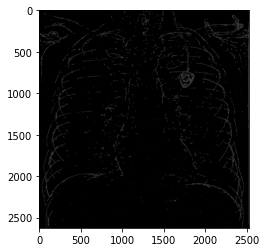

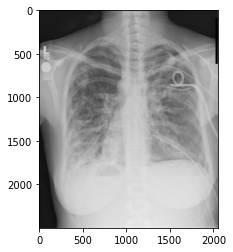

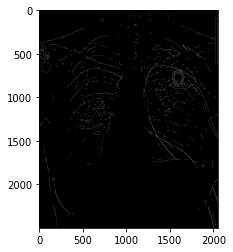

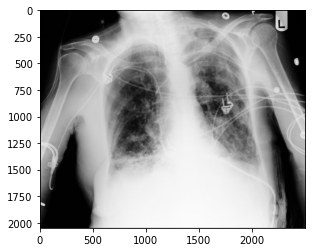

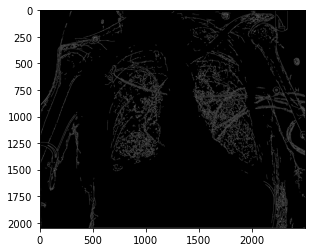

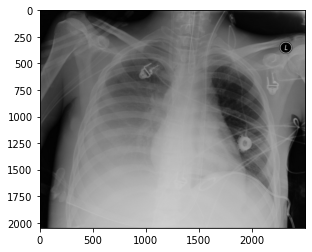

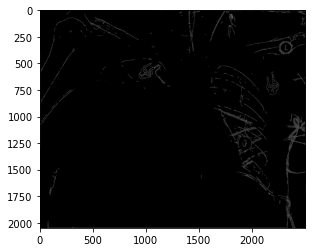

In [29]:
import glob
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 2
def canny(imagepath):
  # image = imagepath
  image = cv2.imread(str(imagepath))

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  plt.imshow(gray, cmap="gray")
  # plt.show()
  plt.imshow(image)
  plt.show()
  edges = cv2.Canny(gray, threshold1=20, threshold2=42)
  plt.imshow(edges, cmap="gray")
  plt.show()
  # print(imagepath)
  # imagepath.dtype()
  # plt.imshow(image)




folder_dir = "/content/IMAGES"
# for image in os.listdir(folder_dir):
#   canny(image)
 
for images in glob.iglob(f'{folder_dir}/*'):
  canny(images)

# New Section

Sobel Edge Detection Algorithm (Horizontal, Vertical, and Filtered)

In [41]:


def sobel(imagepath):
  fig = plt.figure(figsize=(7,7))
  row = 2
  column = 2
  img = cv2.imread(str(imagepath))
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  Gm = cv2.medianBlur(gray,7)
  Hx = np.array([[1,0,-1], [2,0,-2],[1,0,-1]], dtype=np.float32)
  Hy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
  Gx = scipy.signal.convolve2d(Gm, Hx, mode ='same')
  Gy = scipy.signal.convolve2d(Gm,Hy,mode = 'same')
  G = (Gx*Gx + Gy*Gy) ** 0.5 
  imgs = np.array([ gray, Gx, Gy, G ])
  labels = ['Original', 'Horizontal', 'Vertical', 'Filtered']
  
  for i in range(1, column*row+1):
      ax = fig.add_subplot(row,column,i)
      ax.set_title(labels[i-1])
      plt.imshow(imgs[i-1], cmap='gray')
      plt.show()

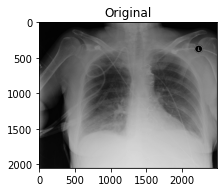

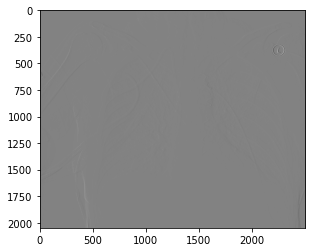

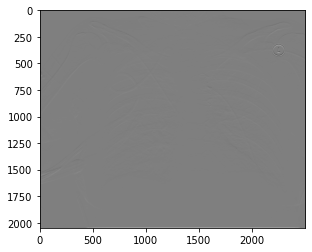

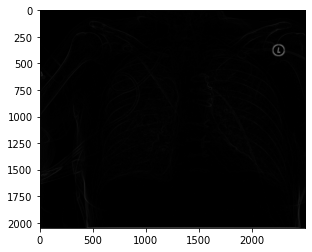

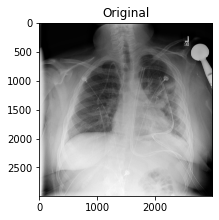

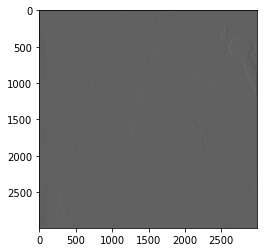

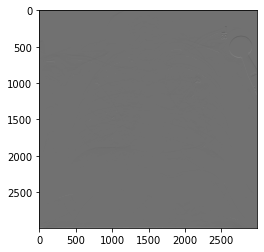

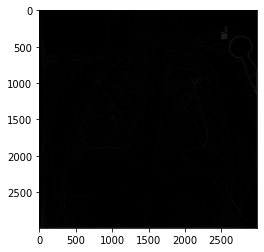

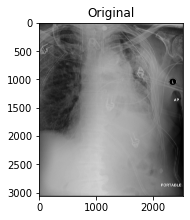

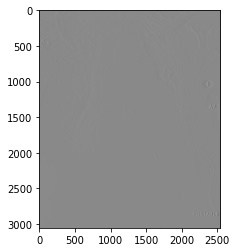

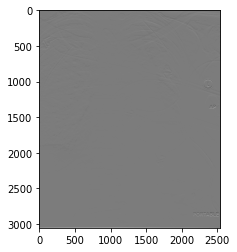

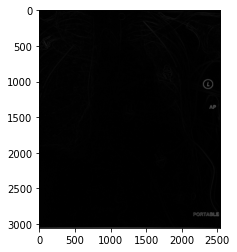

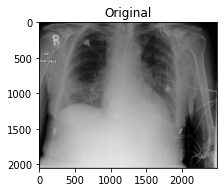

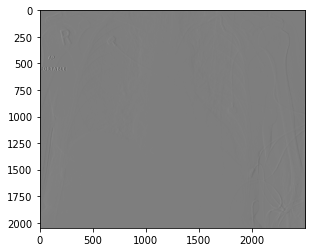

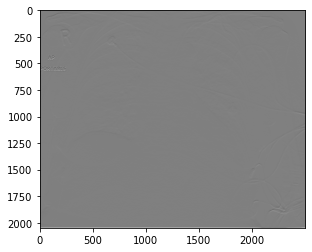

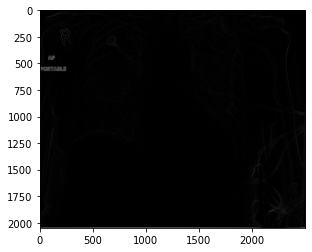

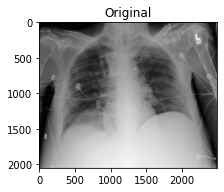

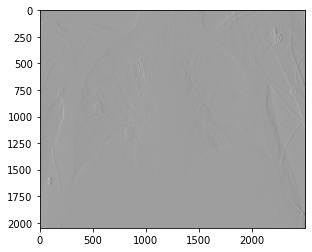

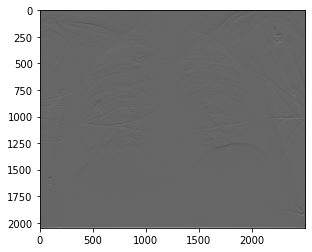

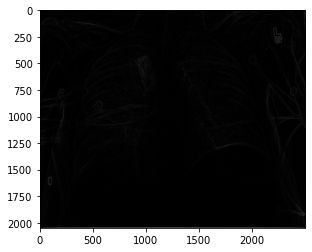

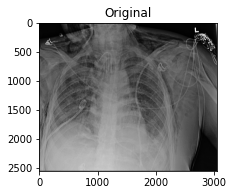

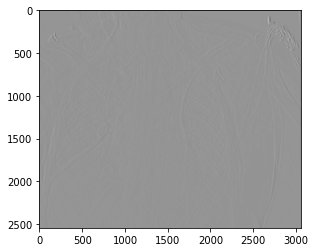

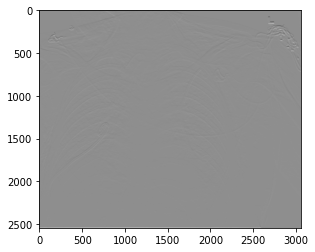

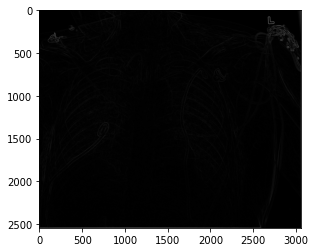

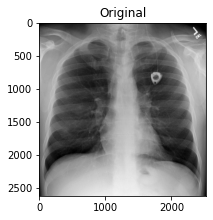

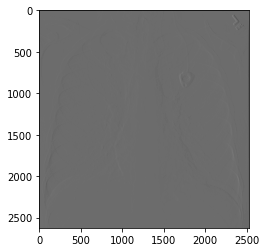

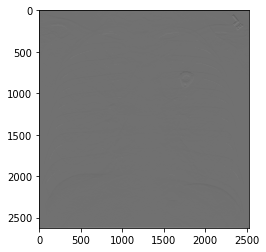

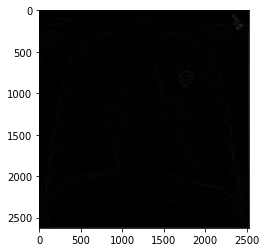

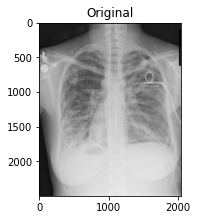

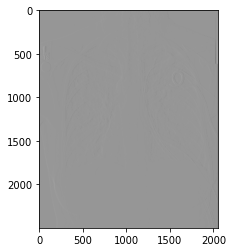

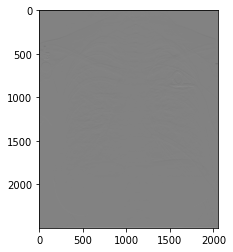

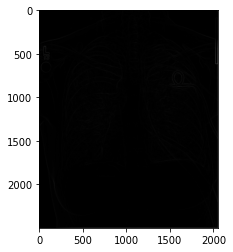

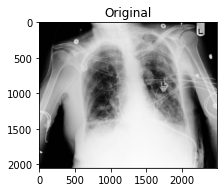

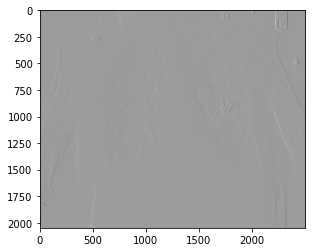

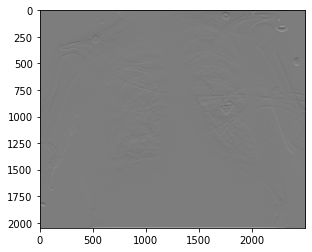

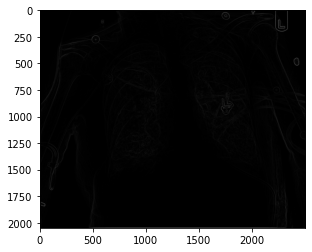

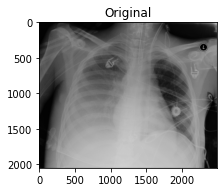

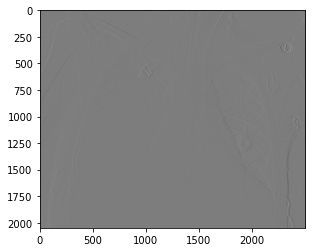

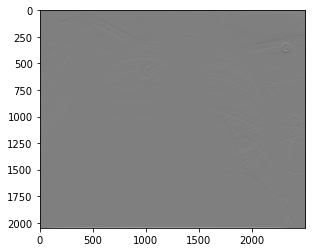

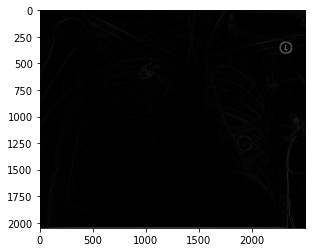

In [42]:
for images in glob.iglob(f'{folder_dir}/*'):
  sobel(images)

**Contrast Stretching, Histogram Equilzation and Adaptive Equalization**

In [43]:
import matplotlib
matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

def contrast(imagepath):
  # Load an example image
  img = cv2.imread(str(imagepath))

  # Contrast stretching
  p2, p98 = np.percentile(img, (2, 98))
  img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

  # Equalization
  img_eq = exposure.equalize_hist(img)

  # Adaptive Equalization
  img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

  # Display results
  fig = plt.figure(figsize=(8, 5))
  axes = np.zeros((2, 4), dtype=np.object)
  axes[0, 0] = fig.add_subplot(2, 4, 1)
  for i in range(1, 4):
      axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
  for i in range(0, 4):
      axes[1, i] = fig.add_subplot(2, 4, 5+i)

  ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
  ax_img.set_title('Low contrast image')

  y_min, y_max = ax_hist.get_ylim()
  ax_hist.set_ylabel('Number of pixels')
  ax_hist.set_yticks(np.linspace(0, y_max, 5))

  ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
  ax_img.set_title('Contrast stretching')

  ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
  ax_img.set_title('Histogram equalization')

  ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
  ax_img.set_title('Adaptive equalization')

  ax_cdf.set_ylabel('Fraction of total intensity')
  ax_cdf.set_yticks(np.linspace(0, 1, 5))

  # prevent overlap of y-axis labels
  fig.tight_layout()
  plt.show()


/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWar

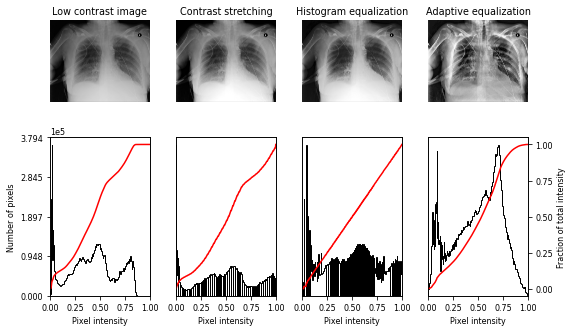

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWar

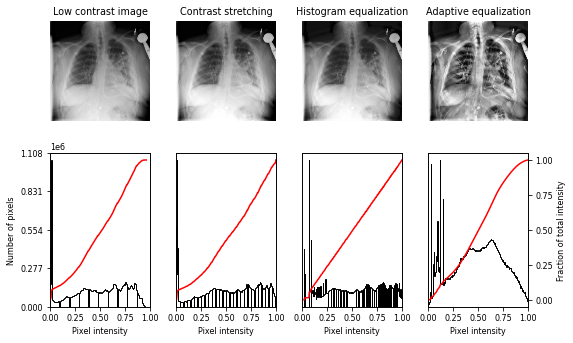

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWar

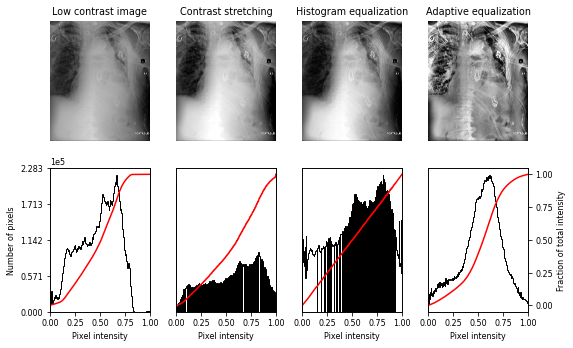

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWar

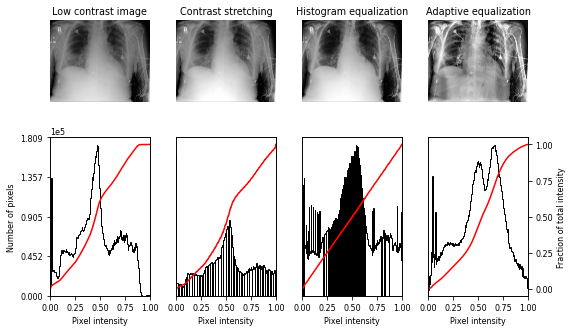

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWar

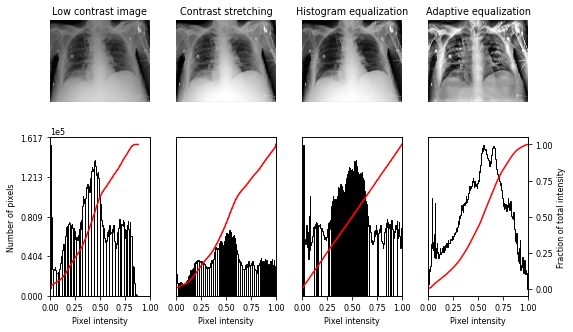

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWar

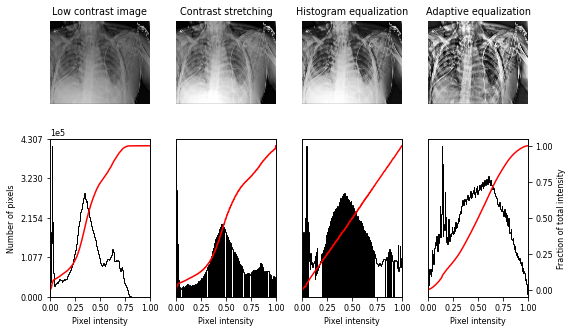

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWar

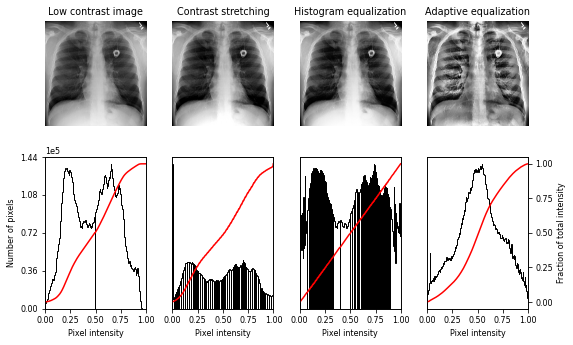

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWar

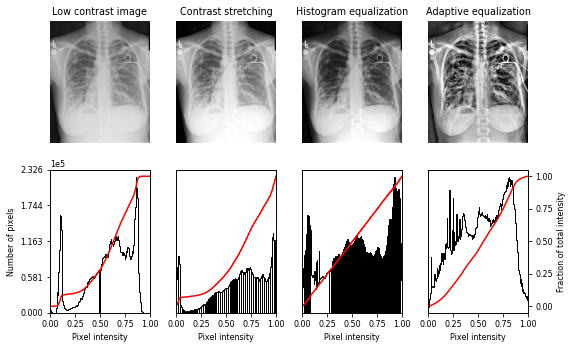

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWar

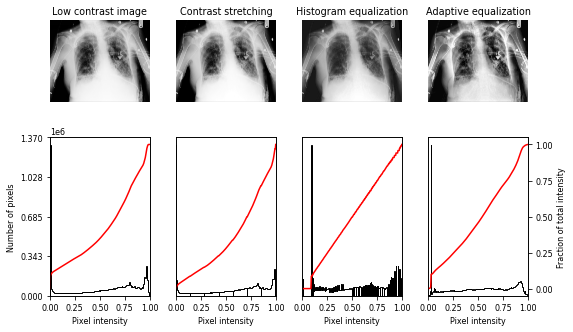

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWar

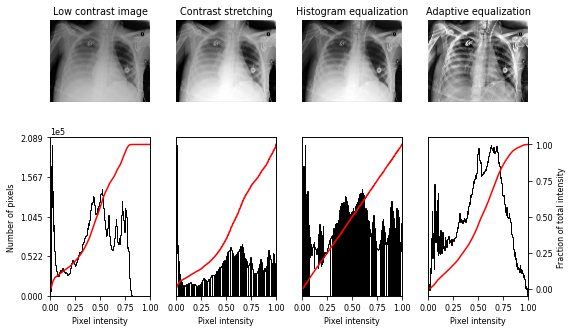

In [45]:
for images in glob.iglob(f'{folder_dir}/*'):
  contrast(images)

**Connected Component Labelling**

In [46]:
def connected_component_label(path):
    
    # Getting the input image
    img = cv2.imread(path, 0)
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
    # Applying cv2.connectedComponents() 
    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()

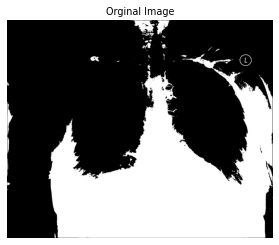

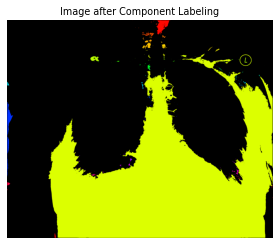

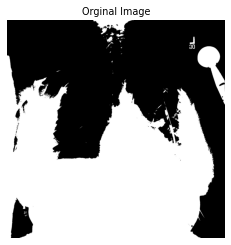

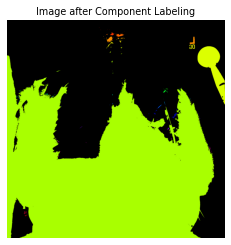

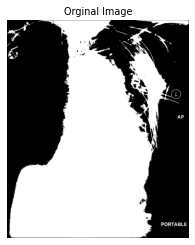

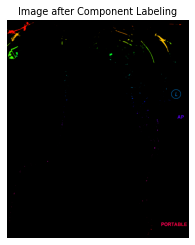

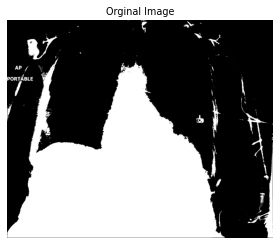

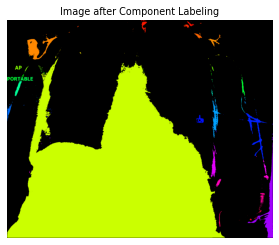

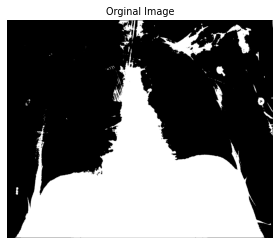

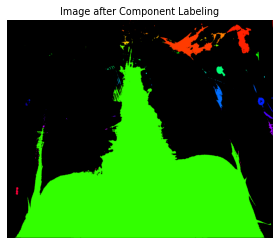

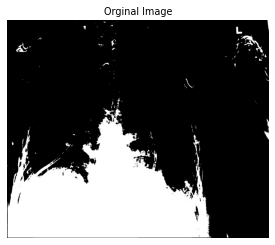

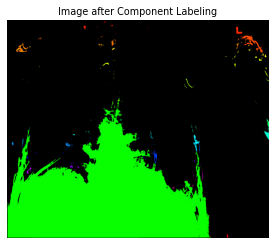

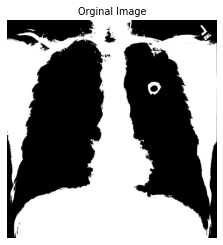

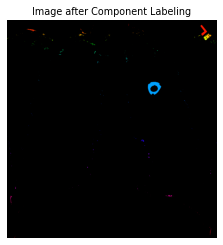

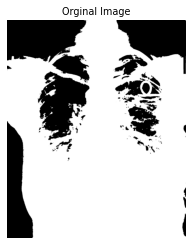

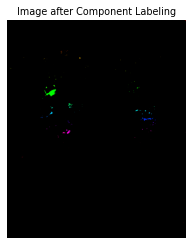

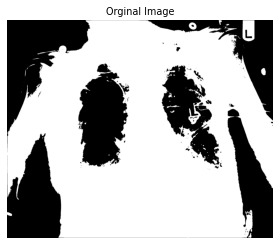

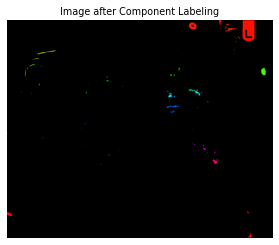

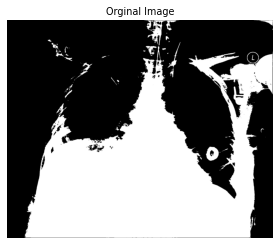

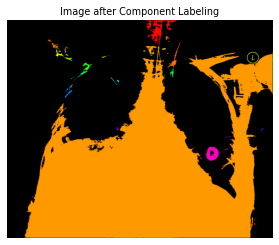

In [47]:
for images in glob.iglob(f'{folder_dir}/*'):
  connected_component_label(images)

**CONCLUSION:-**

I used 8 types of Image Processing Techniques:


1.   Canny Edge Detection
2.   Sobel Vertical Edge Detection
3.   Sobel Horizontal Edge Detection
4.   Sobel Filtered
5.   Contrast Stretching
6.   Histogram Equalization
7.   Adaptive Equilization
8.   Connected Component Labelling

From the observations we can see that the Canny Edge Detection, Sobel (Vertical/Horizontal), and Adaptive Equalization Algorithms seem to extract the features of the catheters and tubes very well. But it is not necessary that those image filtering techniques are the best. It depends a lot on the type of Neural Network too. Neural Networks are amazing at learning features which are not visible to the naked eyes. So, we can use a combination of those filtered images and feed it to our neural network. The type of model which would be best suited to detect position of catheters would be Convolutional Neural Networks (CNN) as it is mostly image data. The best suited architecture for the CNN cannot be said now as a lot of it is just about trial and error. 


For the model to be accurate it would probably need to zoom in on the actual device to train and detect if the device is in the optimal positions like the way it has been decided by the professionals/doctors. But different patients might have completely different positions. So the overall position of tubes and catheters might be completely different from other samples which the model has been trained on. So we might want to train the model specifically for some cases, patients or areas of the x-ray image.


That's why I think the feature extraction part of the process is the most important because it has the most potential for data extraction and data loss too! For the CNN to work accurately we need to feed it with quality data. That's how we can leverage Deep Learning to detect the position of catheters and tubes from x-rays.
